In [ ]:
#### imorting data file and vizualization

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [3]:
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
data  = pd.read_csv('data/employee_data.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
data.profile_report(title="DataReport")

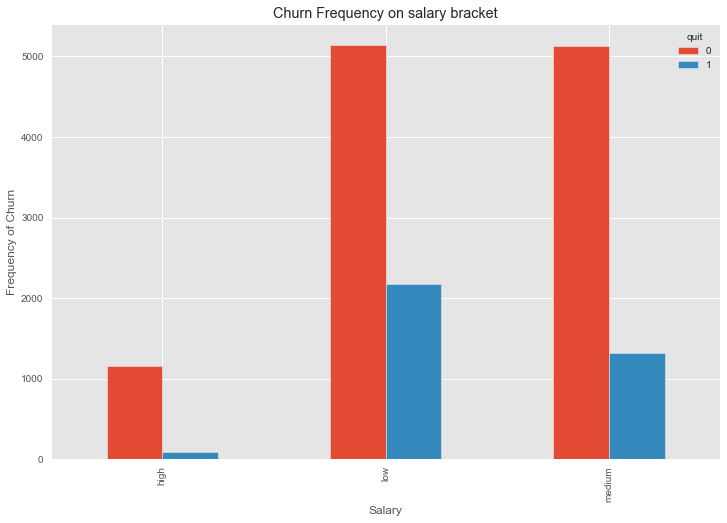

In [28]:
pd.crosstab(data.salary,data.quit).plot(kind='bar')
plt.title('Churn Frequency on salary bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Churn')
plt.show()

In [5]:
cat_var  = ['department','salary']
for i in cat_var:
    cat_list=pd.get_dummies(data[i],prefix=i)
    data = data.join(cat_list)
data.head()    

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [6]:
data.drop(['department','salary'],axis=1,inplace=True)

In [8]:
x = data.loc[:,data.columns != 'quit']
y = data.quit

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [14]:
@interact
def plot_tree(crit=['gini','entropy'],
                 split=['best','random'],
                 depth=IntSlider(min=1,max=10,value=2, continuous_update=False),
                 #forests=IntSlider(min=1,max=10,value=,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = DecisionTreeClassifier(random_state=0,
                                      criterion=crit,
                                      splitter=split,
                                      max_depth = depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf)
    
    estimator.fit(x_train,y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(x_train))))     
    print('Decision Tree Test Accuracy {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    
    graph = Source(tree.export_graphviz(estimator,out_file=None,
                                       feature_names=x_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
     
    display(Image(data=graph.pipe(format='png')))
    return estimator
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [15]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator = RandomForestClassifier(random_state=1,
                                      criterion= crit,
                                      bootstrap=bootstrap,
                                      n_estimators=forests,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf,
                                      n_jobs=-1,
                                      verbose=False).fit(x_train,y_train)
    
    print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(x_train))))     
    print('Random Froests Test Accuracy {:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    num_tree = estimator.estimators_[0]
    print('\Displaying Tree :',0)
    graph = Source(tree.export_graphviz(num_tree,out_file=None,
                                       feature_names=x_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))
     
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [17]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

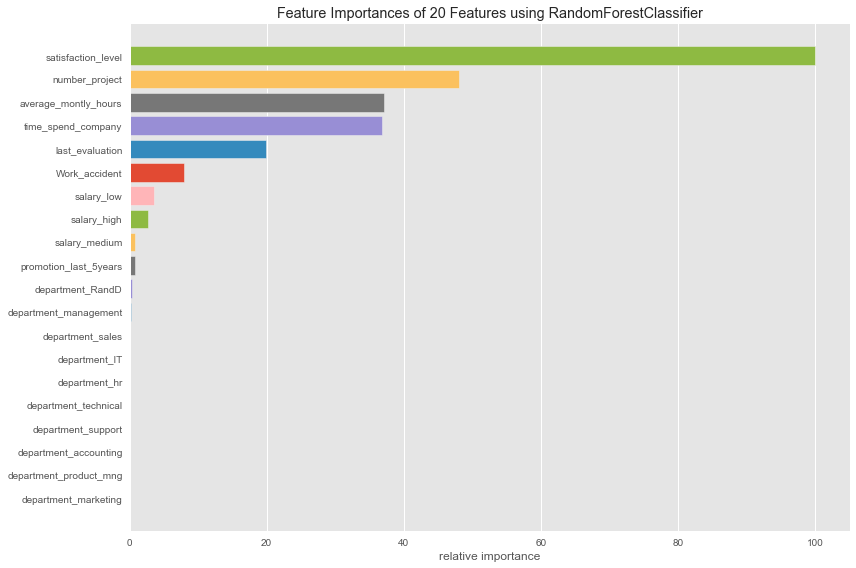

<AxesSubplot:title={'center':'Feature Importances of 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [19]:
### Type code below this line ###

rf = RandomForestClassifier(bootstrap='True', max_depth=3, n_jobs=-1, random_state=1,
                       verbose=False) 

viz  = FeatureImportances(rf)
viz.fit(x_train,y_train)
viz.show()



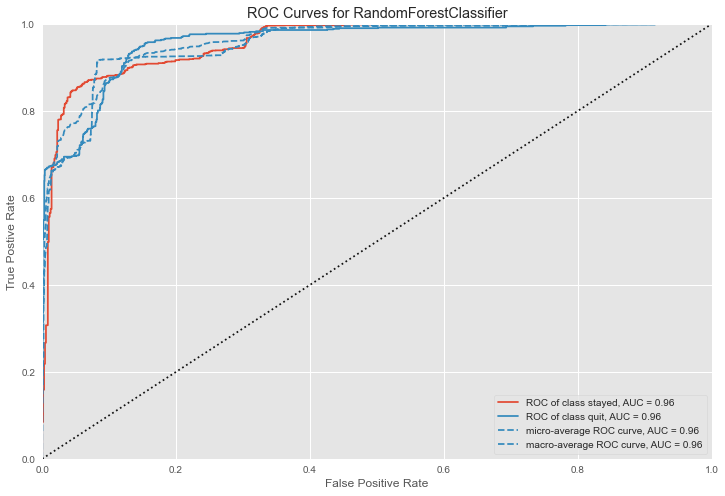

In [23]:
## Plotting Code ##
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf, classes=["stayed", "quit"])

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.poof();